Data cleaning process
1. Excluded the foloowing columns becuase they are meta data :SERIAL NUMBER, ADMISSION NUMBER, DATE OF ADMISSION,DATE OF DISCHARGE, RURAL(R) /URBAN(U), TYPE OF ADMISSION-EMERGENCY/OPD, MONTH YEAR, DURATION OF STAY, DURATION OF INTENSIVE UNIT STAY, OUTCOME
2. Excluded row 3252 because CHEST INFECTION has a value of '\\'
3. Converted the following columns from non-numeric to numberic: GENDER, HB, TLC, PLATELETS, GLUCOSE, UREA, CREATININE, BNP, EF, CHEST INFECTION
4. NA and EMPTY was replaced by 0
5. Excluded the  columns because they indicate the type of heart disease present. They will be used to build the 2 target classes:
    a. Class1: indicates whether a sample has heart disease or not. Possible values are [0,1]. 
        i. 0 represents the absence of heart disease 
        ii. 1 represents the presence of heart disease 
    b. Class2: indicates the type of heart disease. Possible values are [0,1]
        i. 0 represents the absence of heart disease 
        ii. 1 represents the presence of heart disease         


<h1 style="background-color:rgba(88, 139, 174, 0.6);">Import Libraries</h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import warnings
import os
import math
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import pickle



#global settings
warnings.filterwarnings("ignore")
sns.set_theme(rc={"figure.figsize":[15,3]})
np.random.seed(0)

<h1 style="background-color:rgba(88, 139, 174, 0.6);">Methods & Configs</h1>

In [2]:
resource_directory= "../../resource"

def display_attributes_as_string(dataset_name, dataset):
    cols =  ""
    for name in dataset["Explanatory Name"]:
        cols += name.upper().strip() + ", "
    return '\033[1m\033[4m' + dataset_name + '\033[0m' + "\n" + cols[:-2] + "\n\n"


def summarize_data(dataset_name):
    summary_data = dataset_name.describe().T
    null_counts = pd.DataFrame(dataset_name.isna().sum(), columns = ["NULL counts"])
    empty_counts = pd.DataFrame(dataset_name.where(dataset_name=='EMPTY').notna().sum(), columns = ["EMPTY counts"])
    summary_data = summary_data.merge(null_counts, how="right", left_index=True, right_index=True)
    summary_data = summary_data.merge(empty_counts, how="right", left_index=True, right_index=True).sort_values(by = ["count"])
    summary_data.fillna("-", inplace=True)
    print('\033[1mDataset Shape:\033[0m', dataset_name.shape)
    display(summary_data)
    
def print_bold(text):
        print('\033[1m' + text + '\033[0m')

        



<h1 style="background-color:rgba(88, 139, 174, 0.6);">Data Exploration</h1>

In [3]:
#columns info
cvd_data_columns = pd.read_csv(os.path.join(resource_directory, "table_headings.csv"))
cvd_data_columns

,Table Heading,Explanatory Name
0,SNO,Serial Number
1,MRD No.,Admission Number
2,D.O.A,Date of Admission
3,D.O.D,Date of Discharge
4,AGE,AGE
5,GENDER,GENDER
6,RURAL,RURAL(R) /Urban(U)
7,TYPE OF ADMISSION-EMERGENCY/OPD,TYPE OF ADMISSION-EMERGENCY/OPD
8,month year,month year
9,DURATION OF STAY,DURATION OF STAY


In [4]:
#exclude unused columns
exclude_columns = ["SNO", "MRD No.", "D.O.A", "D.O.D", "RURAL", "TYPE OF ADMISSION-EMERGENCY/OPD", "month year", "DURATION OF STAY",
"duration of intensive unit stay", "OUTCOME"]
cvd_data_columns_cleaned = cvd_data_columns[~cvd_data_columns["Table Heading"].isin(exclude_columns)] #[exclude_columns]
cvd_data_columns_cleaned

,Table Heading,Explanatory Name
4,AGE,AGE
5,GENDER,GENDER
12,SMOKING,SMOKING
13,ALCOHOL,ALCOHOL
14,DM,Diabetes Mellitus
15,HTN,Hypertension
16,CAD,Coronary Artery Disease
17,PRIOR CMP,CARDIOMYOPATHY
18,CKD,CHRONIC KIDNEY DISEASE
19,HB,Haemoglobin


In [5]:
#attribute summary
cvd_data_columns_exclude = cvd_data_columns[cvd_data_columns["Table Heading"].isin(exclude_columns)]
display(cvd_data_columns)

print(display_attributes_as_string("ALL ATTRIBUTES",cvd_data_columns))
print(display_attributes_as_string("EXCLUDED ATTRIBUTES", cvd_data_columns_exclude))
print(display_attributes_as_string("REMAINING ATTRIBUTES",cvd_data_columns_cleaned))


,Table Heading,Explanatory Name
0,SNO,Serial Number
1,MRD No.,Admission Number
2,D.O.A,Date of Admission
3,D.O.D,Date of Discharge
4,AGE,AGE
5,GENDER,GENDER
6,RURAL,RURAL(R) /Urban(U)
7,TYPE OF ADMISSION-EMERGENCY/OPD,TYPE OF ADMISSION-EMERGENCY/OPD
8,month year,month year
9,DURATION OF STAY,DURATION OF STAY


ALL ATTRIBUTES
SERIAL NUMBER, ADMISSION NUMBER, DATE OF ADMISSION, DATE OF DISCHARGE, AGE, GENDER, RURAL(R) /URBAN(U), TYPE OF ADMISSION-EMERGENCY/OPD, MONTH YEAR, DURATION OF STAY, DURATION OF INTENSIVE UNIT STAY, OUTCOME, SMOKING, ALCOHOL, DIABETES MELLITUS, HYPERTENSION, CORONARY ARTERY DISEASE, CARDIOMYOPATHY, CHRONIC KIDNEY DISEASE, HAEMOGLOBIN, TOTAL LEUKOCYTES COUNT, PLATELETS, GLUCOSE, UREA, CREATININE, B-TYPE NATRIURETIC PEPTIDE, RAISED CARDIAC ENZYMES, EJECTION FRACTION, SEVERE ANAEMIA, ANAEMIA, STABLE ANGINA, ACUTE CORONARY SYNDROME, ST ELEVATION MYOCARDIAL INFARCTION, ATYPICAL CHEST PAIN, HEART FAILURE, HEART FAILURE WITH REDUCED EJECTION FRACTION, HEART FAILURE WITH NORMAL EJECTION FRACTION, VALVULAR HEART DISEASE, COMPLETE HEART BLOCK, SICK SINUS SYNDROME, ACUTE KIDNEY INJURY, CEREBROVASCULAR ACCIDENT INFRACT, CEREBROVASCULAR ACCIDENT BLEED, ATRIAL FIBRILATION, VENTRICULAR TACHYCARDIA, PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA, CONGENITAL HEART DISEASE, URINARY TRACT INFEC

In [6]:
#Dataset analysis
cvd_data = pd.read_csv(os.path.join(resource_directory, "HDHI Admission data.csv"))
cvd_data_cleaned = cvd_data[cvd_data_columns_cleaned['Table Heading']]

#check duplicates
print('\033[1mDuplicate count:\033[0m', cvd_data.duplicated().sum())

cvd_data_cleaned.columns = cvd_data_cleaned.columns.str.strip()
#cvd_data_columns
cvd_data_cleaned

Duplicate count: 0


,AGE,GENDER,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,0,0,1,0,0,0,0,9.5,...,0,0,0,0,0,0,0,0,0,0
1,65,M,0,1,0,1,1,0,0,13.7,...,0,0,0,0,0,0,0,0,0,0
2,53,M,0,0,1,0,1,0,0,10.6,...,0,0,0,0,0,0,0,0,0,0
3,67,F,0,0,0,1,1,0,0,12.8,...,0,0,0,0,0,0,0,0,0,0
4,60,F,0,0,0,1,0,1,0,13.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,86,F,0,0,1,1,1,0,0,8.8,...,0,0,0,0,0,0,0,0,0,0
15753,50,M,0,0,1,1,0,1,0,13.2,...,0,0,0,0,0,0,0,0,0,0
15754,82,M,0,0,0,1,1,0,0,9.3,...,0,0,0,0,0,0,0,0,0,0
15755,59,F,0,0,0,1,1,0,0,13.1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Data Summary (NOTE: The last 10 columns in the display below are currently non-numeric)
summarize_data(cvd_data_cleaned)

Dataset Shape: (15757, 46)


,count,mean,std,min,25%,50%,75%,max,NULL counts,EMPTY counts
AGE,15757.0,61.42616,13.420862,4.0,54.0,62.0,70.0,110.0,0,0
SSS,15757.0,0.006791,0.082128,0.0,0.0,0.0,0.0,1.0,0,0
AKI,15757.0,0.222377,0.415857,0.0,0.0,0.0,0.0,1.0,0,0
CVA INFRACT,15757.0,0.029447,0.169062,0.0,0.0,0.0,0.0,1.0,0,0
CVA BLEED,15757.0,0.004252,0.065071,0.0,0.0,0.0,0.0,1.0,0,0
AF,15757.0,0.050771,0.219537,0.0,0.0,0.0,0.0,1.0,0,0
VT,15757.0,0.032938,0.178479,0.0,0.0,0.0,0.0,1.0,0,0
CHB,15757.0,0.026147,0.159578,0.0,0.0,0.0,0.0,1.0,0,0
PSVT,15757.0,0.007552,0.086577,0.0,0.0,0.0,0.0,1.0,0,0
UTI,15757.0,0.061877,0.24094,0.0,0.0,0.0,0.0,1.0,0,0


<h1 style="background-color:rgba(88, 139, 174, 0.6);">Data Preprocessing</h1>

In [8]:
#Fill NULL values
cvd_data_cleaned.fillna(0, inplace=True)

In [9]:
#Fill EMPTY values
cvd_data_cleaned.replace("EMPTY", '0', inplace=True)

In [10]:
#Data Summary after removing Null values and 'EMPTY' entries (NOTE: The last 10 columns in the display below are currently non-numeric)
summarize_data(cvd_data_cleaned)

Dataset Shape: (15757, 46)


,count,mean,std,min,25%,50%,75%,max,NULL counts,EMPTY counts
AGE,15757.0,61.42616,13.420862,4.0,54.0,62.0,70.0,110.0,0,0
SSS,15757.0,0.006791,0.082128,0.0,0.0,0.0,0.0,1.0,0,0
AKI,15757.0,0.222377,0.415857,0.0,0.0,0.0,0.0,1.0,0,0
CVA INFRACT,15757.0,0.029447,0.169062,0.0,0.0,0.0,0.0,1.0,0,0
CVA BLEED,15757.0,0.004252,0.065071,0.0,0.0,0.0,0.0,1.0,0,0
AF,15757.0,0.050771,0.219537,0.0,0.0,0.0,0.0,1.0,0,0
VT,15757.0,0.032938,0.178479,0.0,0.0,0.0,0.0,1.0,0,0
CHB,15757.0,0.026147,0.159578,0.0,0.0,0.0,0.0,1.0,0,0
PSVT,15757.0,0.007552,0.086577,0.0,0.0,0.0,0.0,1.0,0,0
UTI,15757.0,0.061877,0.24094,0.0,0.0,0.0,0.0,1.0,0,0


In [11]:
#Convert GENDER column to numeric
column = 'GENDER'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(),'\n')
print_bold('Unique values count for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].value_counts(),'\n')

#column update
cvd_data_cleaned[column].replace(['M', 'F'], [0,1], inplace=True)


#After update
print_bold('Unique values count for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].value_counts(),'\n')

Unique values for GENDER BEFORE updates:
['M' 'F'] 

Unique values count for GENDER BEFORE updates:
M    9990
F    5767
Name: GENDER, dtype: int64 

Unique values count for GENDER AFTER updates:
0    9990
1    5767
Name: GENDER, dtype: int64 



In [12]:
#Convert HB column to numeric
column = 'HB'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')

#column update
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')


#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')

Unique values for HB BEFORE updates:
['9.5' '13.7' '10.6' '12.8' '13.6' '13.5' '13.3' '12.6' 0 '11.4' '13.2'
 '10.3' '13.8' '14.7' '11.6' '12.9' '15.2' '14.6' '10.8' '14.9' '12.7'
 '10.1' '12' '13' '8.5' '10.5' '10.2' '10' '13.1' '8.7' '11.3' '14.3'
 '16.3' '15.4' '12.1' '15.1' '12.5' '10.9' '14.8' '15.5' '11.8' '7.8'
 '14.2' '14.5' '16.6' '14.4' '17.1' '10.4' '16.9' '7.4' '15.3' '16.8' '9'
 '14' '12.4' '14.1' '7.2' '15.8' '11.2' '11.1' '9.2' '11.7' '9.7' '15.6'
 '16' '11.9' '12.2' '13.9' '8.6' '13.4' '8.9' '16.5' '18.7' '9.6' '7.5'
 '9.4' '9.9' '17.6' '7.9' '9.1' '10.7' '15.9' '12.3' '17.9' '17.3' '6.8'
 '16.1' '15' '9.3' '8.3' '8.4' '8.8' '15.7' '16.7' '4.5' '7.6' '11.5'
 '6.4' '7.1' '17.4' '8.2' '5.9' '5.3' '6.1' '17.2' '7' '11' '8' '17' '9.8'
 '18' '7.3' '16.4' '8.1' '16.2' '7.7' '17.7' '18.4' '5.7' '17.8' '6.7'
 '12.08' '5.4' '6.2' '18.2' '6.3' '19.5' '18.6' '5.5' '6.5' '17.5' '5.8'
 '4.4' '18.1' '19.8' '20.1' '4.7' '4.6' '19.2' '5.1' '4.3' '6' '5' '3.9'
 '22' '21.2' '6.09' '19.1'

In [13]:
#Convert TLC column to numeric
column = 'TLC'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')


#column update
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')


#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')


Unique values for TLC BEFORE updates:
['16.1' '9' '14.7' '9.9' '9.1' '22.3' '12.6' '9.5' 0 '4.8' '7.9' '83'
 '12.2' '10.1' '3.5' '9.8' '12.1' '15.2' '6.3' '8.1' '12' '10.8' '8.2'
 '8.5' '4.2' '0.6' '8' '11.5' '11.2' '8.4' '12.5' '23.8' '11.4' '7.8'
 '3.6' '13' '10.4' '11.8' '9.2' '6.4' '13.2' '12.8' '80.8' '9.7' '14.3'
 '4.6' '5' '7.5' '19' '9.3' '7.4' '8.3' '6' '6.7' '13.4' '12.3' '7.6'
 '4.5' '13.3' '18.8' '26' '10' '12.9' '15.1' '7.1' '37' '14.4' '6.5'
 '25.6' '28.9' '7.7' '22.8' '3.8' '8.6' '1.8' '21' '9.6' '14.5' '4.9'
 '15.7' '11' '15.4' '28' '17.4' '14.9' '11.9' '10.3' '8.8' '5.2' '23.3'
 '19.6' '30.9' '10.6' '10.2' '15' '7.2' '21.5' '9.4' '5.9' '8.9' '7.3'
 '18.5' '0.94' '18.6' '3.3' '13.5' '2.1' '6.2' '16.4' '17.2' '13.9' '15.3'
 '22.5' '5.6' '16' '16.6' '13.6' '31.3' '18' '26.6' '6.9' '21.8' '11.1'
 '10.7' '17.3' '10.9' '6.6' '21.1' '16.5' '14.2' '5.8' '11.6' '6.8' '14'
 '11.7' '28.5' '12.4' '10.5' '15.9' '13.7' '20.1' '8.7' '15.5' '17.9'
 '6.1' '18.7' '4.7' '22.1' '24.9' '11

In [14]:
#Convert PLATELETS column to numeric
column = 'PLATELETS'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')


#column update
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')


#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')

Unique values for PLATELETS BEFORE updates:
['337' '149' '329' '286' '26' '322' '166' '328' 0 '173' '227' '1.38' '57'
 '187' '280' '374' '229' '219' '148' '338' '268' '308' '15' '332' '213'
 '19' '32' '327' '68' '212' '457' '199' '258' '130' '309' '224' '139' '67'
 '21' '230' '245' '228' '265' '181' '365' '349' '210' '162' '140' '159'
 '150' '242' '373' '341' '215' '171' '250' '325' '105' '200' '136' '492'
 '290' '237' '235' '164' '377' '190' '469' '202' '259' '315' '352' '0'
 '158' '97' '252' '233' '174' '196' '300' '283' '408' '385' '205' '254'
 '63' '119' '189' '175' '134' '247' '110' '109' '357' '344' '103' '204'
 '79' '13.1' '321' '292' '295' '249' '201' '380' '391' '296' '241' '293'
 '51' '147' '345' '122' '144' '400' '42' '246' '220' '415' '146' '167'
 '264' '218' '243' '191' '183' '203' '179' '444' '78' '289' '66' '90'
 '108' '209' '360' '40' '11' '216' '157' '267' '214' '53' '91' '248' '514'
 '266' '1179' '184' '255' '278' '222' '208' '324' '177' '141' '50' '244'
 '253' '155' 

In [15]:
#Convert GLUCOSE column to numeric
column = 'GLUCOSE'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')

#column update
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')


#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')

Unique values for GLUCOSE BEFORE updates:
['80' '112' '187' '130' '144' '217' '277' '159' '156' '200' '263' '105'
 '170' 0 '250' '92' '240' '126' '135' '180' '100' '349' '122' '84' '158'
 '249' '36' '145' '152' '131' '261' '198' '140' '141' '173' '191' '120'
 '285' '227' '146' '220' '269' '270' '102' '332' '96' '79' '110' '98'
 '108' '184' '71' '85' '160' '175' '99' '0' '104' '91' '162' '138' '224'
 '177' '103' '116' '87' '106' '171' '34' '124' '132' '89' '377' '148' '27'
 '416' '163' '90' '121' '357' '254' '127' '232' '196' '48' '155' '266'
 '229' '117' '181' '125' '60' '262' '134' '168' '197' '236' '154' '280'
 '312' '192' '190' '88' '182' '147' '174' '107' '82' '143' '410' '157'
 '137' '118' '214' '164' '186' '95' '119' '208' '78' '97' '42' '109' '425'
 '74' '81' '83' '94' '179' '128' '93' '183' '202' '178' '367' '114' '215'
 '207' '70' '68' '115' '284' '305' '346' '888' '234' '205' '296' '219'
 '256' '153' '166' '150' '113' '600' '362' '139' '123' '55' '169' '136'
 '149' '344' '330

In [16]:
#Convert UREA column to numeric
column = 'UREA'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')


#column update
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')


#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')


Unique values for UREA BEFORE updates:
['34' '18' '93' '27' '55' '51' '28' '30' 0 '29' '45' '62' '31' '32' '180'
 '46' '33' '24' '199' '39' '20' '8' '90' '116' '104' '16' '118' '136' '38'
 '63' '26' '41' '35' '22' '206' '17' '43' '42' '61' '71' '44' '23' '25'
 '19' '53' '94' '143' '141' '68' '109' '168' '140' '128' '186' '84' '74'
 '59' '0' '495' '159' '47' '144' '79' '15' '82' '65' '78' '151' '176'
 '101' '57' '77' '0.1' '124' '150' '76' '103' '73' '11' '66' '64' '36'
 '299' '188' '164' '12' '40' '75' '52' '37' '58' '89' '50' '145' '217'
 '85' '107' '14' '83' '132' '48' '72' '169' '148' '81' '21' '54' '122' '5'
 '152' '119' '125' '70' '157' '0.68' '49' '13' '102' '56' '158' '100' '60'
 '190' '99' '229' '98' '131' '127' '108' '22.2' '67' '80' '135' '92' '195'
 '230.8' '245' '329' '191' '88' '182' '69' '117' '121' '232' '138' '208'
 '112' '86' '133' '96' '9' '95' '220' '301' '160' '87' '114' '97' '165'
 '110' '172' '91' '213' '105' '142' '185' '241' '97.9' '113' '115' '126'
 '154' '149'

In [17]:
#Convert CREATININE column to numeric
column = 'CREATININE'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')


#column update
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')


#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')

Unique values for CREATININE BEFORE updates:
['0.9' '2.3' '0.6' '1.25' '1' 0 '0.8' '1.3' '1.2' '2.4' '0.7' '0.91'
 '1.37' '0.98' '0.54' '0.44' '2.2' '1.56' '2.7' '0.64' '2.13' '1.7' '1.24'
 '0.99' '1.1' '0.59' '0.5' '1.6' '1.4' '1.5' '1.09' '0.78' '0.92' '0.73'
 '2.9' '11.9' '0.58' '6.3' '0' '8.2' '0.68' '3.7' '1.06' '0.82' '4.6'
 '0.65' '0.93' '5.7' '1.13' '0.87' '2.76' '3.8' '2.5' '2.35' '0.72' '3.4'
 '0.4' '2' '5.6' '4.1' '0.66' '1.74' '2.1' '1.9' '1.8' '2.66' '5.2' '3.5'
 '2.55' '1.38' '2.8' '1.21' '8.6' '3.1' '1.39' '1.08' '5' '1.19' '0.81'
 '0.71' '2.6' '0.3' '7.4' '1.69' '8.9' '8.1' '4.3' '5.5' '8.5' '13.9'
 '1.67' '1.03' '1.48' '1.26' '3.9' '1.17' '4.4' '7.8' '6.6' '3.6' '0.89'
 '3.2' '5.49' '9.1' '1.61' '5.3' '6.9' '5.4' '7.3' '6.1' '1.47' '0.75' '3'
 '4' '2.15' '7.5' '1.11' '1.14' '2.01' '10.66' '1.18' '5.9' '2.83' '1.36'
 '4.7' '1.16' '1.02' '0.74' '6.2' '0.57' '1.12' '4.5' '4.26' '1.27' '1.01'
 '6.4' '1.42' '1.05' '2.27' '2.63' '7.2' '1.59' '2.29' '11.82' '1.15'
 '1.07' '1.

In [18]:
#Convert BNP column to numeric
column = 'BNP'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')


#column update
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')


#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')

Unique values for BNP BEFORE updates:
['1880' 0 '210' ... '209' '764' '832'] 

Unique values for BNP AFTER updates:
[1880.    0.  210. ...  209.  764.  832.] 



In [19]:
#Convert EF column to numeric
column = 'EF'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')

#column update
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')


#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')

Unique values for EF BEFORE updates:
['35' '42' 0 '16' '25' '30' '45' '60' '32' '40' '36' '0' '22' '37' '38'
 '28' '50' '20' '49' '46' '52' '34' '48' '54' '55' '18' '26' '44' '33'
 '43' '24' '58' '27' '53' '15' '57' '56' '47' '39' '41' '19' '14' '29'
 '21' '31' '59' '23' '38.4'] 

Unique values for EF AFTER updates:
[35.  42.   0.  16.  25.  30.  45.  60.  32.  40.  36.  22.  37.  38.
 28.  50.  20.  49.  46.  52.  34.  48.  54.  55.  18.  26.  44.  33.
 43.  24.  58.  27.  53.  15.  57.  56.  47.  39.  41.  19.  14.  29.
 21.  31.  59.  23.  38.4] 



In [20]:
#Convert CHEST INFECTION column to numeric (Note: This column has a row with "\\". This row will be remove as this doesn't seem to be a valid entry
column = 'CHEST INFECTION'

#Before update
print_bold('Unique values for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].unique(), '\n')
print_bold('Unique values counts for ' + column +  ' BEFORE updates:')
print(cvd_data_cleaned[column].value_counts(), '\n')


#column update
cvd_data_cleaned = cvd_data_cleaned[cvd_data_cleaned[column] != "\\"]                               #remove invalid row
cvd_data_cleaned[column] = pd.to_numeric(cvd_data_cleaned[column], errors='coerce')



#After update
print_bold('Unique values for ' + column +  ' AFTER updates:')
print(cvd_data_cleaned[column].unique(), '\n')

Unique values for CHEST INFECTION BEFORE updates:
['0' '1' '\\'] 

Unique values counts for CHEST INFECTION BEFORE updates:
0    15415
1      341
\        1
Name: CHEST INFECTION, dtype: int64 

Unique values for CHEST INFECTION AFTER updates:
[0 1] 



In [21]:
#Normalize data
cvd_data_cleaned = cvd_data_cleaned.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
cvd_data_cleaned

,AGE,GENDER,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,0.726415,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.358491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.575472,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.516981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.462264,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.594340,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.483019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.528302,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.513208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,0.773585,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.332075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15753,0.433962,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.498113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15754,0.735849,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.350943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15755,0.518868,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.494340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Data Summary after preprocessing
summarize_data(cvd_data_cleaned)

Dataset Shape: (15756, 46)


,count,mean,std,min,25%,50%,75%,max,NULL counts,EMPTY counts
AGE,15756.0,0.541754,0.126616,0.0,0.471698,0.547170,0.622642,1.0,0,0
HFREF,15756.0,0.153656,0.360630,0.0,0.000000,0.000000,0.000000,1.0,0,0
HFNEF,15756.0,0.136583,0.343417,0.0,0.000000,0.000000,0.000000,1.0,0,0
VALVULAR,15756.0,0.035034,0.183872,0.0,0.000000,0.000000,0.000000,1.0,0,0
CHB,15756.0,0.026149,0.159583,0.0,0.000000,0.000000,0.000000,1.0,0,0
SSS,15756.0,0.006791,0.082130,0.0,0.000000,0.000000,0.000000,1.0,0,0
AKI,15756.0,0.222391,0.415866,0.0,0.000000,0.000000,0.000000,1.0,0,0
CVA INFRACT,15756.0,0.029449,0.169067,0.0,0.000000,0.000000,0.000000,1.0,0,0
CVA BLEED,15756.0,0.004252,0.065073,0.0,0.000000,0.000000,0.000000,1.0,0,0
AF,15756.0,0.050774,0.219543,0.0,0.000000,0.000000,0.000000,1.0,0,0


In [23]:
cvd_data_cleaned['HTN'].value_counts()
cvd_data_cleaned['CAD'].value_counts()
cvd_data_cleaned['PRIOR CMP'].value_counts()
cvd_data_cleaned['HEART FAILURE'].value_counts()
cvd_data_cleaned['CONGENITAL'].value_counts()

0.0    15591
1.0      165
Name: CONGENITAL, dtype: int64

In [24]:
#get heart disease classes
#Class1 has [0,1] for the absence and presence of the disease respectively
#Class1 has [0,1,2,3,4,5] for NO HEART DISEASE, HEART FAILURE, HTN,CAD,PRIOR CMP, CONGENITAL  

class1_values = []
class2_values = []
cvd_types = {'HEART FAILURE': 1, 'HTN':2, 'CAD':3, 'PRIOR CMP':4, 'CONGENITAL':5}

#Get the classes
for i in range(0, len(cvd_data_cleaned)):
    heard_disease_list = []
    current_row_data = cvd_data_cleaned.iloc[i][['HTN', 'CAD', 'PRIOR CMP', 'HEART FAILURE', 'CONGENITAL']]

    if (current_row_data['HTN'] == 1): heard_disease_list.append('HTN')
    if (current_row_data['CAD'] == 1): heard_disease_list.append('CAD')
    if (current_row_data['PRIOR CMP'] == 1): heard_disease_list.append('PRIOR CMP')
    if (current_row_data['HEART FAILURE'] == 1): heard_disease_list.append('HEART FAILURE')
    if (current_row_data['CONGENITAL'] == 1): heard_disease_list.append('CONGENITAL')
    if(len(heard_disease_list) == 0):  
        class1_values.append(0)
        class2_values.append(0)
    elif(len(heard_disease_list) == 1):  
        class1_values.append(1)
        class2_values.append(cvd_types.get(heard_disease_list[0]))
    else:
        class1_values.append(None)
        class2_values.append(None)



cvd_data_cleaned['Class1'] = class1_values
cvd_data_cleaned['Class2'] = class2_values
cvd_data_cleaned.head(5)

,AGE,GENDER,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,Class1,Class2
0,0.726415,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.358491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.575472,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.516981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.462264,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.594340,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.483019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.528302,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.513208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [25]:
#Remove rows without classes
cvd_class_data = cvd_data_cleaned.dropna()
#Remove heart disease coloumns 
cvd_class_data.drop(['HTN', 'CAD', 'PRIOR CMP', 'HEART FAILURE', 'CONGENITAL'], inplace=True, axis=1)
cvd_class_data.shape

(6897, 43)

In [26]:
#Data summary after adding classes
summarize_data(cvd_class_data)

Dataset Shape: (6897, 43)


,count,mean,std,min,25%,50%,75%,max,NULL counts,EMPTY counts
AGE,6897.0,0.511516,0.140407,0.0,0.433962,0.528302,0.603774,0.896226,0,0
VALVULAR,6897.0,0.045382,0.208156,0.0,0.000000,0.000000,0.000000,1.000000,0,0
CHB,6897.0,0.027403,0.163267,0.0,0.000000,0.000000,0.000000,1.000000,0,0
SSS,6897.0,0.008264,0.090539,0.0,0.000000,0.000000,0.000000,1.000000,0,0
AKI,6897.0,0.160070,0.366697,0.0,0.000000,0.000000,0.000000,1.000000,0,0
CVA INFRACT,6897.0,0.031318,0.174188,0.0,0.000000,0.000000,0.000000,1.000000,0,0
CVA BLEED,6897.0,0.005220,0.072064,0.0,0.000000,0.000000,0.000000,1.000000,0,0
AF,6897.0,0.052632,0.223313,0.0,0.000000,0.000000,0.000000,1.000000,0,0
VT,6897.0,0.027403,0.163267,0.0,0.000000,0.000000,0.000000,1.000000,0,0
HFNEF,6897.0,0.045092,0.207521,0.0,0.000000,0.000000,0.000000,1.000000,0,0


<h1 style="background-color:rgba(88, 139, 174, 0.6);">Data Visualization</h1>

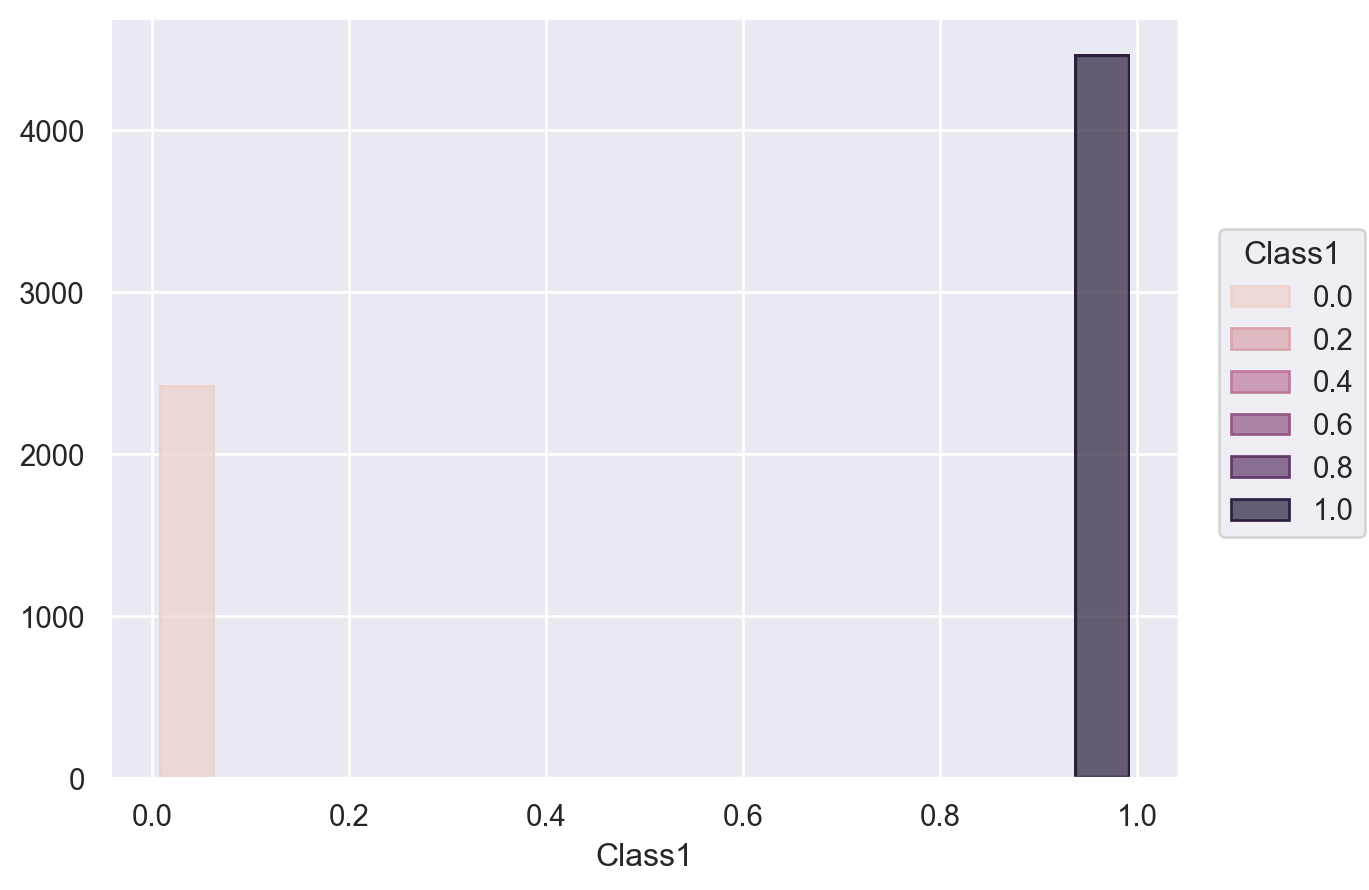

In [27]:
#Class1 distribution
(
    so.Plot(data = cvd_class_data, x = "Class1", color = "Class1")
    .add(so.Bar(), so.Hist())    
)

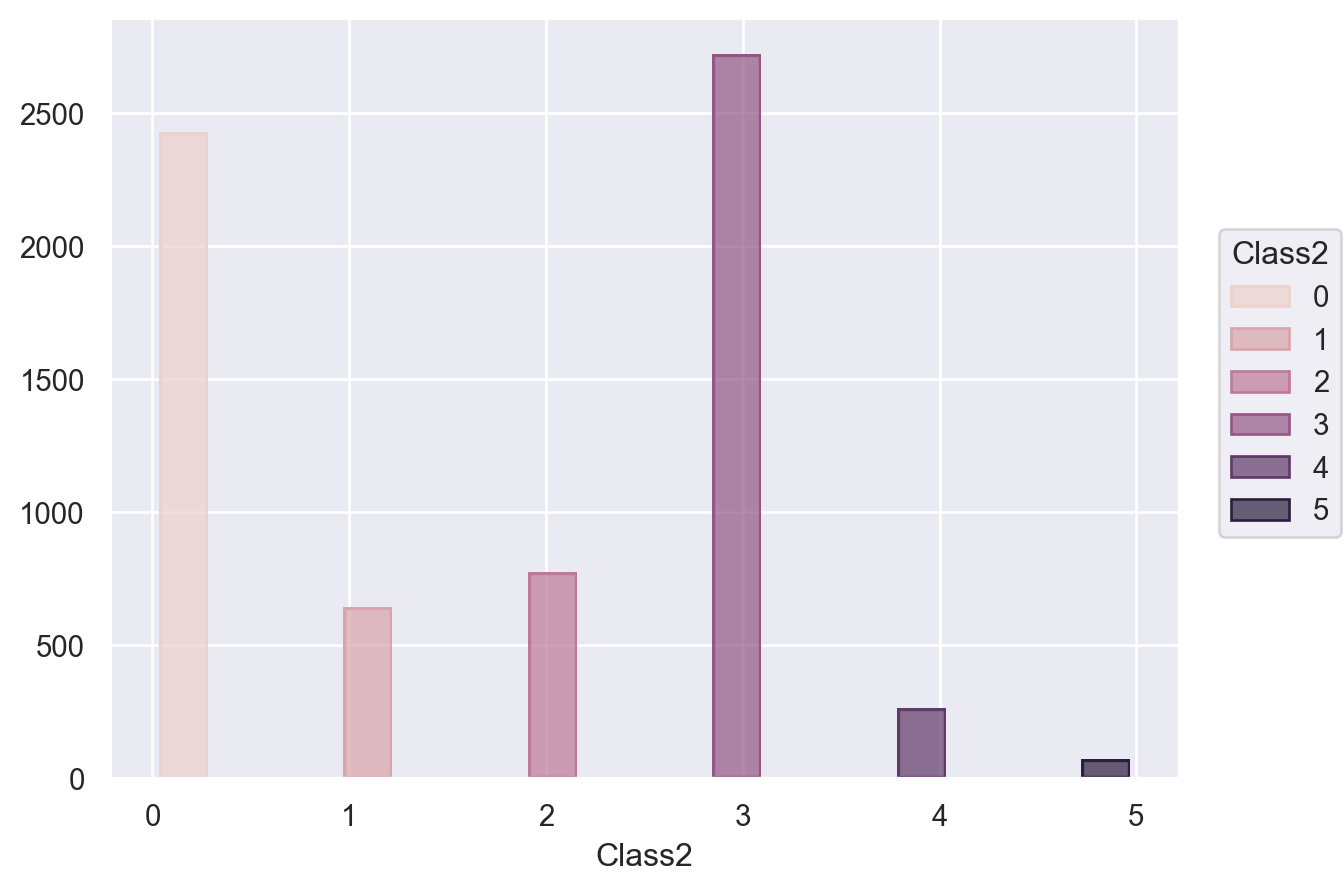

In [28]:
#Class2 distribution

(
    so.Plot(data = cvd_class_data, x = "Class2", color = "Class2")
    .add(so.Bar(), so.Hist())    
)

<h1 style="background-color:rgba(88, 139, 174, 0.6);">Model Generation</h1>

In [29]:
def test_models(cvd_data):
    
    #create source data
    train_data = cvd_data.drop(["Class1","Class2"], axis=1)
    test_data_c1 = cvd_data["Class1"]
    test_data_c2 = cvd_data["Class2"]

    #split data
    x_train_c1, x_test_c1, y_train_c1, y_test_c1  = train_test_split(train_data, test_data_c1, test_size=0.3, random_state=0)
    x_train_c2, x_test_c2, y_train_c2, y_test_c2  = train_test_split(train_data, test_data_c2, test_size=0.3, random_state=0)

    
    #get predictions
    models = {"Descision Tree Classification": DecisionTreeClassifier, "RadomForest": RandomForestRegressor, 
              "Perceptron": Perceptron, "GaussianNB": GaussianNB, "KNN": KNeighborsClassifier}
    model_scores = []
    for model_name, model in models.items():
        if(model_name in ["KNN", "GaussianNB"]):
            score1 = model().fit(x_train_c1, y_train_c1).score(x_test_c1, y_test_c1)
            score2 = model().fit(x_train_c2, y_train_c2).score(x_test_c2, y_test_c2)
        else:     
            score1 = model(random_state=0).fit(x_train_c1, y_train_c1).score(x_test_c1, y_test_c1)
            score2 = model(random_state=0).fit(x_train_c2, y_train_c2).score(x_test_c2, y_test_c2)

        model_scores.append([round(score1*100,2), round(score2*100,2)])
        
        #create models using Decision Trees (for now)
        if(model_name == 'Descision Tree Classification'):
            with open('model_class1.pkl', 'wb') as file:
                pickle.dump(model().fit(x_train_c1, y_train_c1), file)
            
            with open('model_class2.pkl', 'wb') as file:
                pickle.dump(model().fit(x_train_c2, y_train_c2), file)
                
            
        
    data_split_details = [[cvd_data.shape, cvd_data.shape],[x_train_c1.shape, x_train_c2.shape], [y_train_c1.shape, y_train_c2.shape], 
                  [x_test_c1.shape, x_test_c2.shape], [y_test_c1.shape, y_test_c2.shape]]
    model_scores.extend(data_split_details)
    

    result_df = pd.DataFrame(model_scores, columns=["Class1","Class2"])
    result_df.index =  list(models.keys()) + ["All Data","X-Train","Y-Train","X-Test","X-Test"]
    display(result_df)    

In [31]:
#Test models
test_models(cvd_class_data)

,Class1,Class2
Descision Tree Classification,72.08,63.19
RadomForest,33.14,36.59
Perceptron,68.7,56.23
GaussianNB,56.43,21.74
KNN,73.62,62.9
All Data,"(6897, 43)","(6897, 43)"
X-Train,"(4827, 41)","(4827, 41)"
Y-Train,"(4827,)","(4827,)"
X-Test,"(2070, 41)","(2070, 41)"
X-Test,"(2070,)","(2070,)"


In [32]:
##search for better model NOTE: Currently the highest accuracy is 73.62%

In [33]:
#Get 30 best features: NOTE: Currently using 41 features
selector = SelectKBest(k=25)
cvd_feature_data = cvd_class_data.drop(['Class1','Class2'], axis=1)
cvd_class_data_30 = selector.fit_transform(cvd_feature_data , cvd_class_data["Class1"])
cvd_class_data_30_df = pd.DataFrame(cvd_class_data_30, columns = cvd_feature_data.columns[selector.get_support()])
cvd_class_data_30_df['Class1']= list(cvd_class_data['Class1'])
cvd_class_data_30_df['Class2']= list(cvd_class_data['Class2'])
print("Old number of features:",cvd_feature_data.shape[1])
print("New number of features:",cvd_class_data_30.shape[1])
print("Selected features: ",cvd_feature_data.columns[selector.get_support()])

Old number of features: 41
New number of features: 25
Selected features:  Index(['AGE', 'GENDER', 'SMOKING', 'DM', 'CKD', 'HB', 'TLC', 'GLUCOSE', 'UREA',
       'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'STABLE ANGINA',
       'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HFREF', 'HFNEF', 'AKI', 'PSVT',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK',
       'PULMONARY EMBOLISM'],
      dtype='object')


In [34]:
#Test models after Feature selection
test_models(cvd_class_data_30_df)

,Class1,Class2
Descision Tree Classification,72.27,64.4
RadomForest,32.26,35.55
Perceptron,72.03,50.48
GaussianNB,54.78,22.46
KNN,74.06,64.35
All Data,"(6897, 27)","(6897, 27)"
X-Train,"(4827, 25)","(4827, 25)"
Y-Train,"(4827,)","(4827,)"
X-Test,"(2070, 25)","(2070, 25)"
X-Test,"(2070,)","(2070,)"


In [35]:
def test_models2(class1_data, class2_data, k):
    
    #create source data
    features_c1 = class1_data.drop(["Class1"], axis=1)
    features_c2 = class2_data.drop(["Class2"], axis=1)

    class_c1 = class1_data["Class1"]
    class_c2 = class2_data["Class2"]

    #split data
    x_train_c1, x_test_c1, y_train_c1, y_test_c1  = train_test_split(features_c1, class_c1, test_size=0.3, random_state=0)
    x_train_c2, x_test_c2, y_train_c2, y_test_c2  = train_test_split(features_c2, class_c2, test_size=0.3, random_state=0)

    
    #get predictions
    models = {"Descision Tree Classification": DecisionTreeClassifier, "RadomForest": RandomForestRegressor, 
              "Perceptron": Perceptron, "GaussianNB": GaussianNB, "KNN": KNeighborsClassifier}
    model_scores = []
    for model_name, model in models.items():
        if(model_name in ["KNN", "GaussianNB"]):
            score1 = model().fit(x_train_c1, y_train_c1).score(x_test_c1, y_test_c1)
            score2 = model().fit(x_train_c2, y_train_c2).score(x_test_c2, y_test_c2)
        else:     
            score1 = model(random_state=0).fit(x_train_c1, y_train_c1).score(x_test_c1, y_test_c1)
            score2 = model(random_state=0).fit(x_train_c2, y_train_c2).score(x_test_c2, y_test_c2)

        model_scores.append([round(score1*100,2), round(score2*100,2)])
        

                

        

    result_df = pd.DataFrame(model_scores, columns=["Class1","Class2"])
    result_df.index =  [model_name  + "_" + str(k) for model_name in models.keys()]
    return result_df
    
    


In [36]:
all_results = pd.DataFrame(columns=["Class1","Class2"])
cvd_feature_data = cvd_class_data.drop(['Class1','Class2'], axis=1)


for i in range(1, len(cvd_feature_data.columns)+1):
    selector1 = SelectKBest(k=i)
    cvd_class_data_k_class1 = selector1.fit_transform(cvd_feature_data , cvd_class_data["Class1"])
    cvd_class_data_k_class1_df = pd.DataFrame(cvd_class_data_k_class1, columns = cvd_feature_data.columns[selector1.get_support()])
    cvd_class_data_k_class1_df['Class1']= list(cvd_class_data['Class1'])
    
    selector2 = SelectKBest(k=i)
    cvd_class_data_k_class2 = selector2.fit_transform(cvd_feature_data , cvd_class_data["Class2"])
    cvd_class_data_k_class2_df = pd.DataFrame(cvd_class_data_k_class2, columns = cvd_feature_data.columns[selector2.get_support()])
    cvd_class_data_k_class2_df['Class2']= list(cvd_class_data['Class2'])
    result_df = test_models2(cvd_class_data_k_class1_df, cvd_class_data_k_class2_df, i)
    all_results = pd.concat([all_results,result_df])
    print("K=",i,"is complete")
    
all_results

K= 1 is complete
K= 2 is complete
K= 3 is complete
K= 4 is complete
K= 5 is complete
K= 6 is complete
K= 7 is complete
K= 8 is complete
K= 9 is complete
K= 10 is complete
K= 11 is complete
K= 12 is complete
K= 13 is complete
K= 14 is complete
K= 15 is complete
K= 16 is complete
K= 17 is complete
K= 18 is complete
K= 19 is complete
K= 20 is complete
K= 21 is complete
K= 22 is complete
K= 23 is complete
K= 24 is complete
K= 25 is complete
K= 26 is complete
K= 27 is complete
K= 28 is complete
K= 29 is complete
K= 30 is complete
K= 31 is complete
K= 32 is complete
K= 33 is complete
K= 34 is complete
K= 35 is complete
K= 36 is complete
K= 37 is complete
K= 38 is complete
K= 39 is complete
K= 40 is complete
K= 41 is complete


,Class1,Class2
Descision Tree Classification_1,64.88,43.96
RadomForest_1,5.83,1.25
Perceptron_1,56.57,9.76
GaussianNB_1,64.88,43.96
KNN_1,56.57,40.10
...,...,...
Descision Tree Classification_41,72.08,63.19
RadomForest_41,33.14,36.59
Perceptron_41,68.70,56.23
GaussianNB_41,56.43,21.74


In [37]:
all_results[all_results['Class1'] == max(all_results['Class1'])]

,Class1,Class2
KNN_18,75.36,65.07


In [38]:
all_results[all_results['Class2'] == max(all_results['Class2'])]

,Class1,Class2
KNN_16,75.07,65.8


In [39]:
pd.set_option('display.max_rows', 500)
all_results.sort_values(by=['Class1'], ascending=False)

,Class1,Class2
KNN_18,75.36,65.07
KNN_21,75.27,64.15
KNN_20,75.22,63.53
KNN_19,75.22,64.83
KNN_16,75.07,65.80
KNN_17,74.88,65.12
KNN_14,74.64,65.60
KNN_15,74.59,65.75
KNN_28,74.54,64.06
KNN_27,74.35,63.19


In [40]:
#add extra columns for visualization
all_results["Number of Features"] = [index.split("_")[1] for index in all_results.index]
all_results["Classifier"] = [index.split("_")[0] for index in all_results.index]
all_results["Average Accuracy"] = (all_results["Class1"] + all_results["Class2"])/2
all_results.head(15)

,Class1,Class2,Number of Features,Classifier,Average Accuracy
Descision Tree Classification_1,64.88,43.96,1,Descision Tree Classification,54.420
RadomForest_1,5.83,1.25,1,RadomForest,3.540
Perceptron_1,56.57,9.76,1,Perceptron,33.165
GaussianNB_1,64.88,43.96,1,GaussianNB,54.420
KNN_1,56.57,40.10,1,KNN,48.335
Descision Tree Classification_2,64.88,48.65,2,Descision Tree Classification,56.765
RadomForest_2,6.60,2.52,2,RadomForest,4.560
Perceptron_2,56.57,48.65,2,Perceptron,52.610
GaussianNB_2,56.57,48.65,2,GaussianNB,52.610
KNN_2,56.57,44.78,2,KNN,50.675


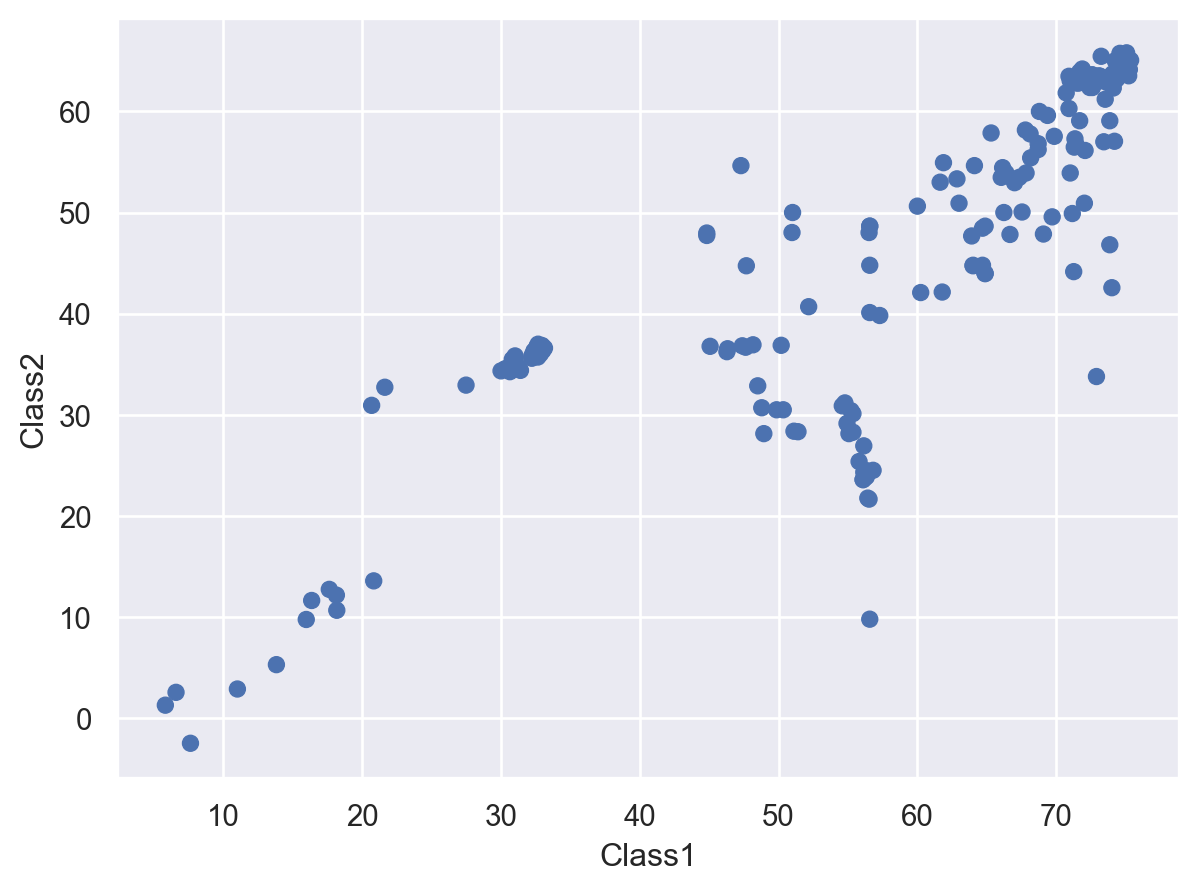

In [41]:
#Compare Class1 vs Class2
(
    so.Plot(data = all_results, x = "Class1", y= "Class2")
    .add(so.Dot())    
)

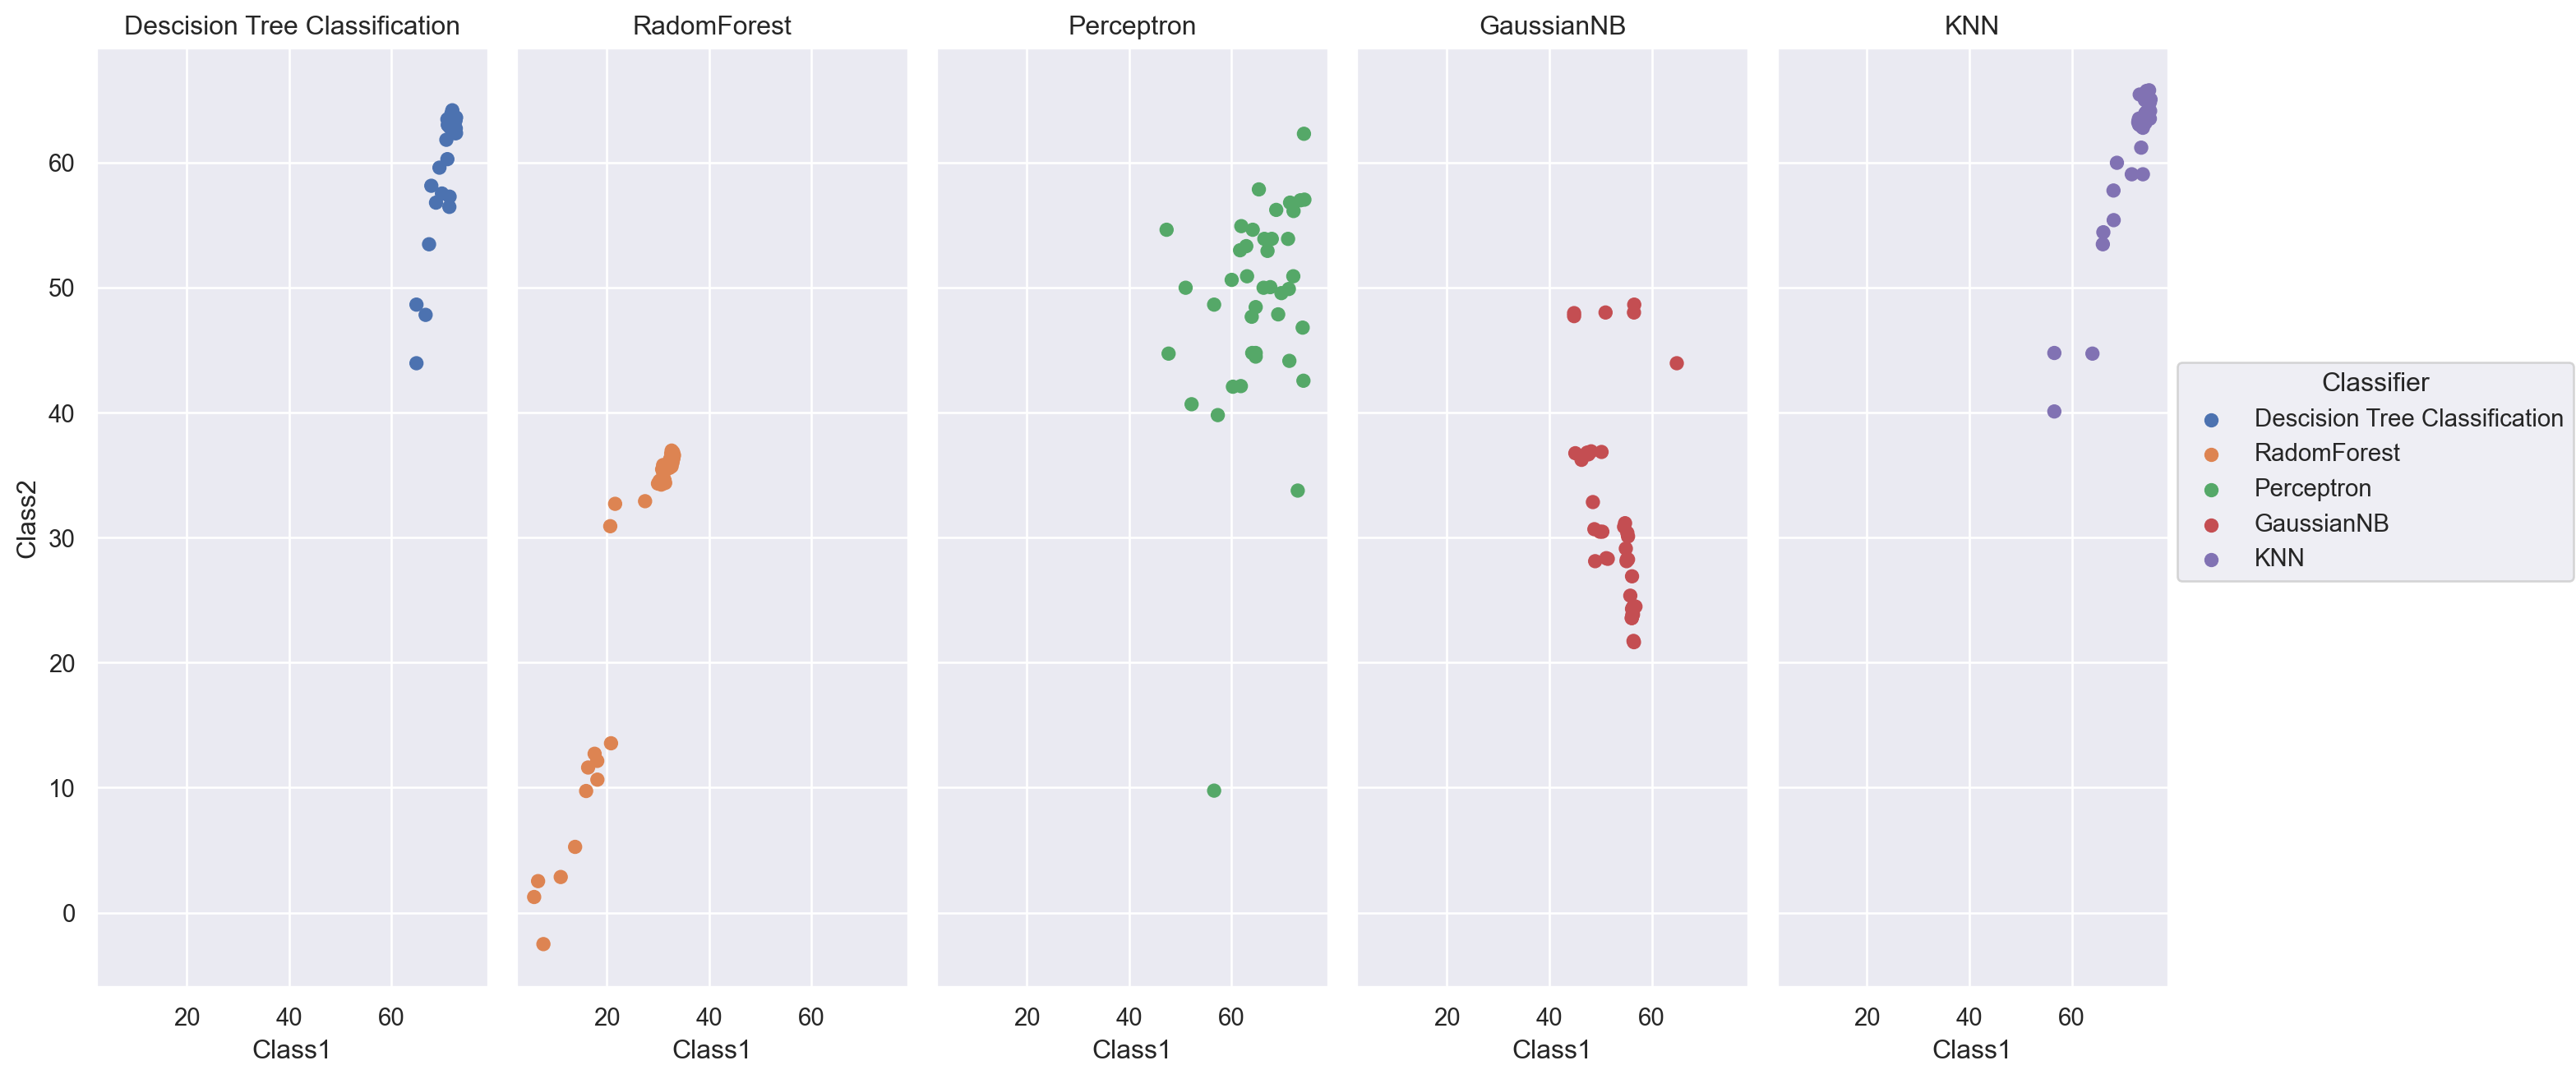

In [42]:
#Visual different classifiers
(
    so.Plot(data = all_results, x = "Class1", y= "Class2", color="Classifier")
    .add(so.Dot())
    .facet("Classifier")
    .layout(size=(14,7))

)

In [43]:
#Decision Tree Classfier and KNN seems to be performing better

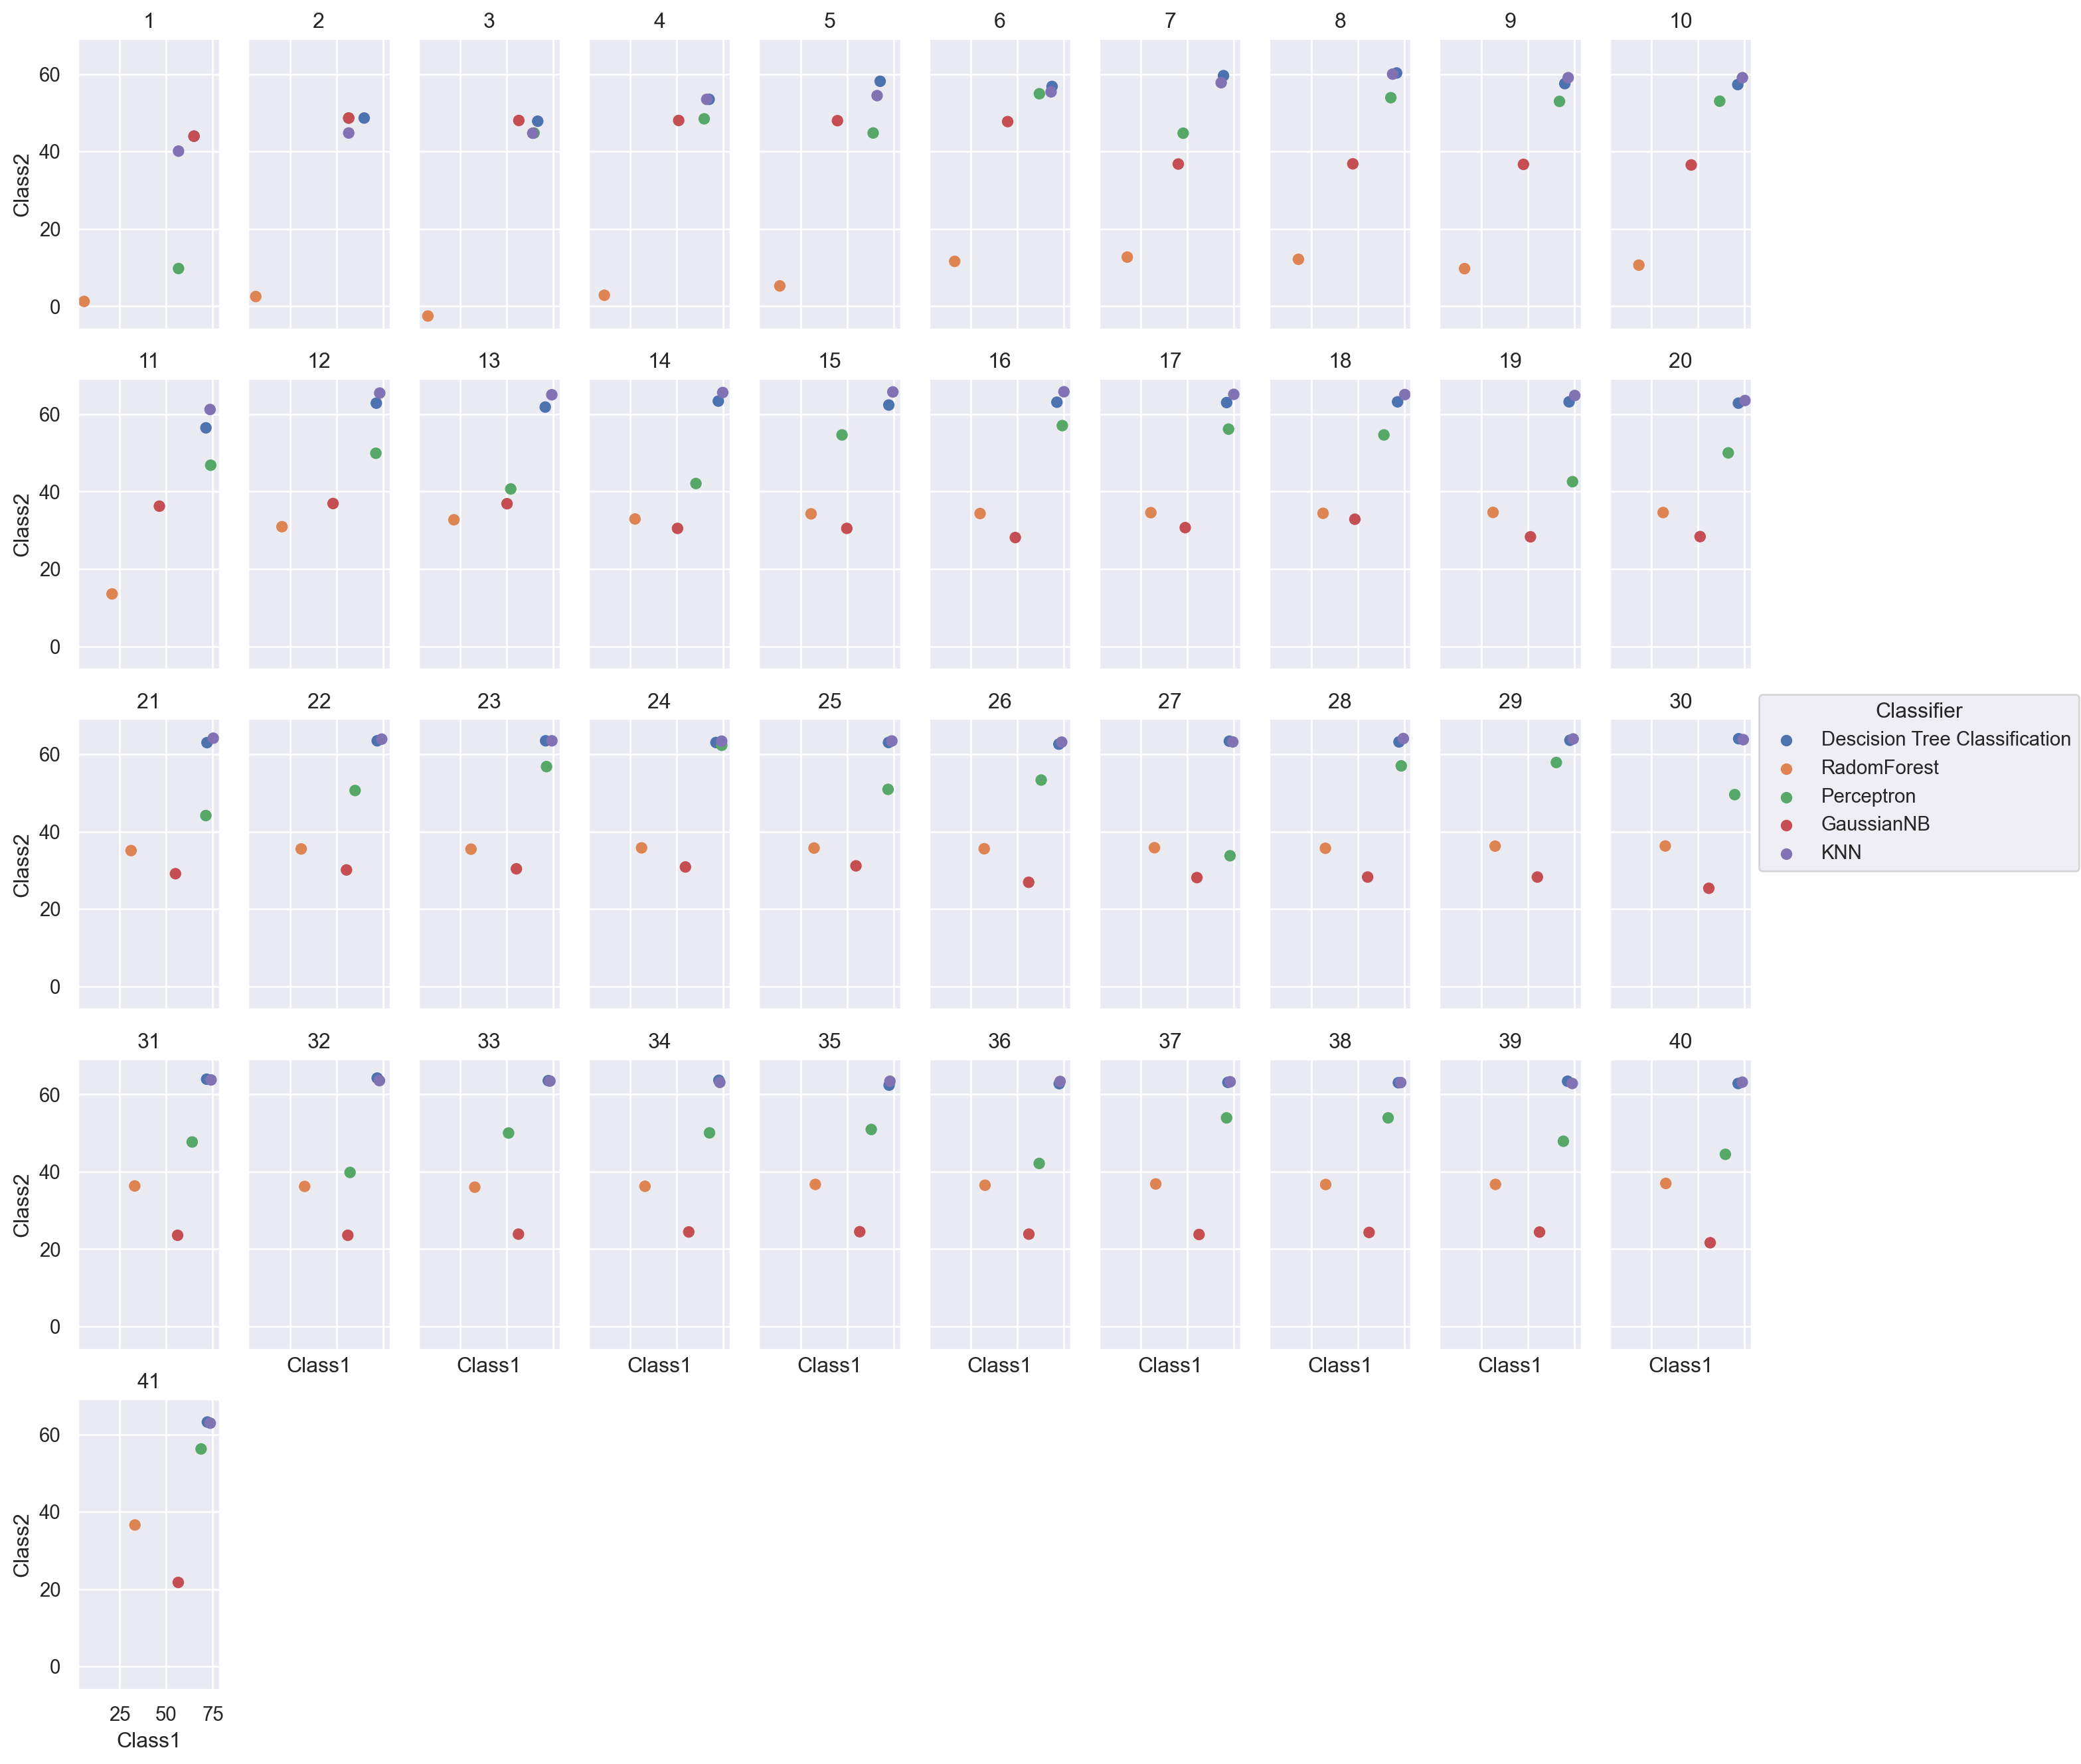

In [44]:
#Visual based on number of features
(
    so.Plot(data = all_results, x = "Class1", y= "Class2", color="Classifier")
    .add(so.Dot())
    .facet("Number of Features", wrap=10)
    .layout(size=(14,14))

)

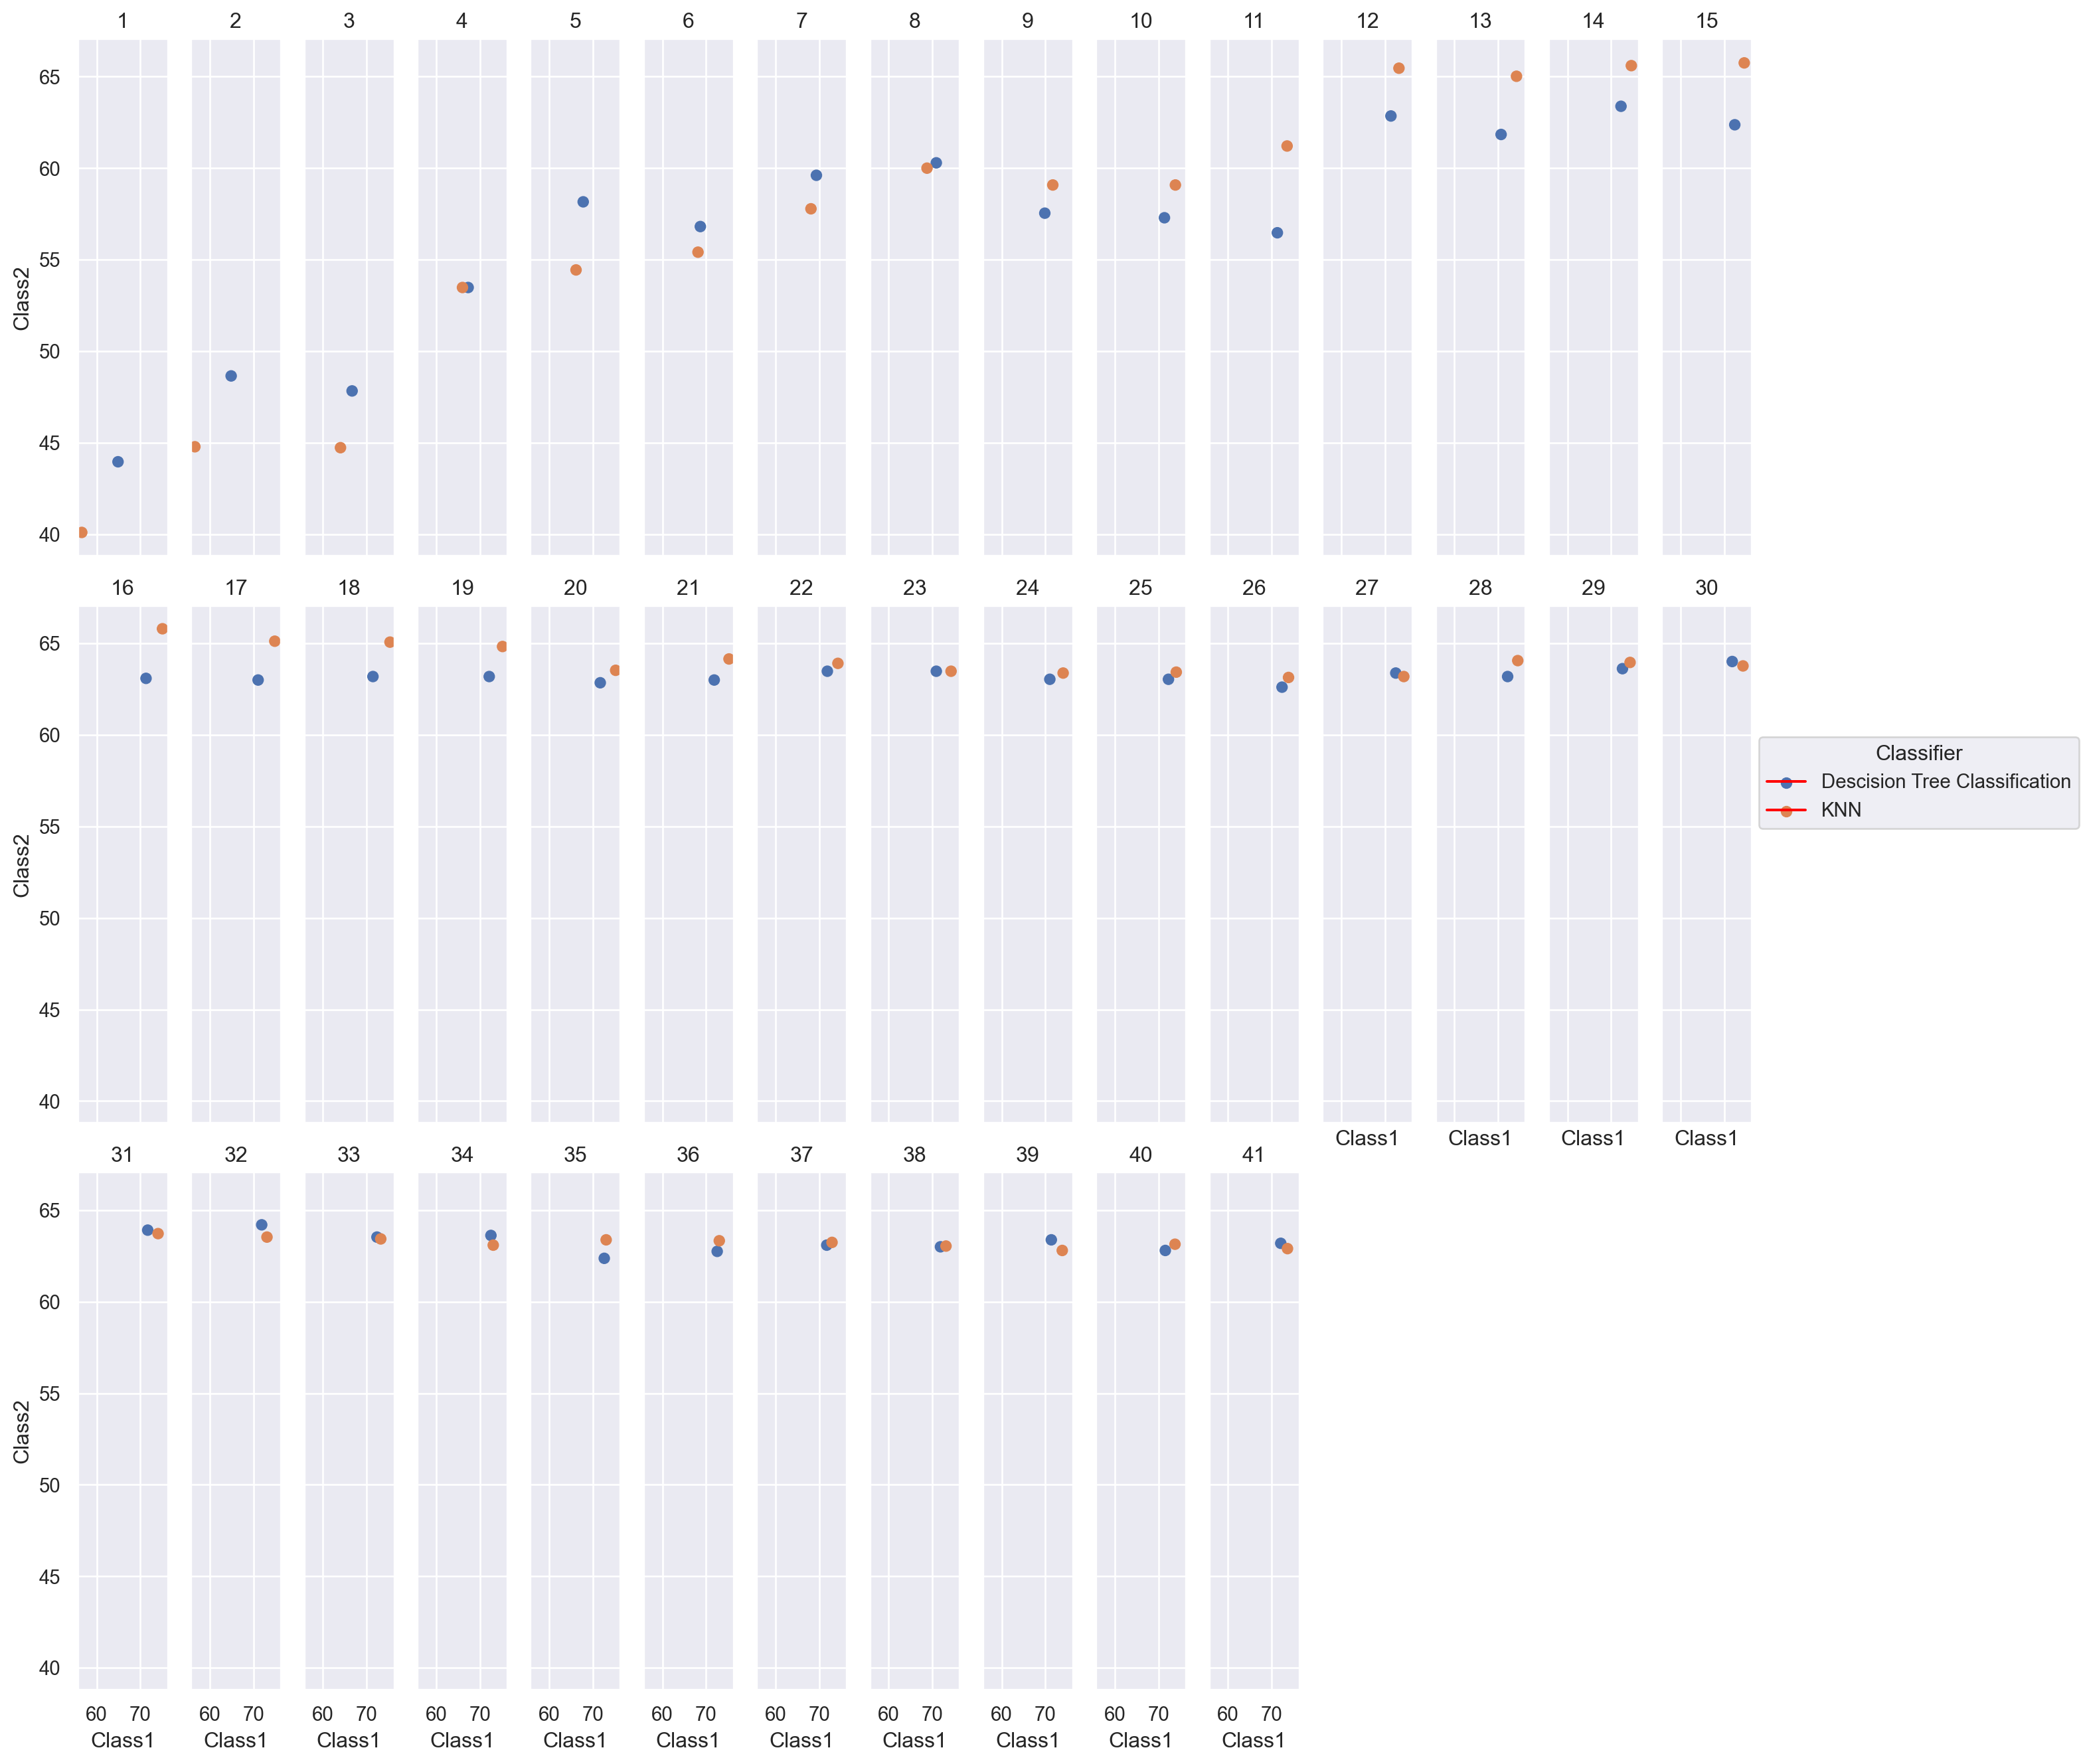

In [45]:
#Visual based on number of features (considering only Decision Tree Classfier and KNN)
sub_result = all_results[all_results["Classifier"].isin(["Descision Tree Classification", "KNN"])]
(
    so.Plot(data = sub_result, x = "Class1", y= "Class2", color="Classifier")
    .add(so.Dot())
    .add(so.Line(color="red"), col="Average Accuracy")
    .facet("Number of Features", wrap=15)
    .layout(size=(14,14))

)

In [46]:
#Generating features file
'''
headings = pd.read_csv(os.path.join(resource_directory, "table_headings.csv"))
headings = headings[headings["Table Heading"].isin(cvd_feature_data.columns)]
output_filename = os.path.join(resource_directory, "feature_names.csv")
headings["Explanatory Name"] = headings["Explanatory Name"].str.upper().str.strip()
headings["Table Heading"] = headings["Table Heading"].str.upper().str.strip()
headings.to_csv(output_filename, index=False)
headings["Explanatory Name"].shape
'''

'\nheadings = pd.read_csv(os.path.join(resource_directory, "table_headings.csv"))\nheadings = headings[headings["Table Heading"].isin(cvd_feature_data.columns)]\noutput_filename = os.path.join(resource_directory, "feature_names.csv")\nheadings["Explanatory Name"] = headings["Explanatory Name"].str.upper().str.strip()\nheadings["Table Heading"] = headings["Table Heading"].str.upper().str.strip()\nheadings.to_csv(output_filename, index=False)\nheadings["Explanatory Name"].shape\n'

In [ ]:
#Deep learning
#source: https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners

from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential 
from keras.layers import Dense 

In [ ]:
#split data
x_train_c1, x_test_c1, y_train_c1, y_test_c1  = train_test_split(cvd_feature_data, class_c1, test_size=0.3, random_state=0)
x_train_c2, x_test_c2, y_train_c2, y_test_c2  = train_test_split(cvd_feature_data, class_c2, test_size=0.3, random_state=0)


def get_clf():
    clf = Sequential() 
    clf.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train_c1.shape[1]))
    clf.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
    clf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return clf




clf = KerasClassifier(build_fn = get_clf, epochs = 100)
accuracies_c1 = cross_val_score(estimator = classifier, X = x_train_c1, y = y_train_c1, cv = 3)
accuracies_c2 = cross_val_score(estimator = classifier, X = x_train_c2, y = y_train_c2, cv = 3)
print("Class 1", accuracies_c1.mean())
print("Class 2", accuracies_c2.mean())

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [1]:
import sys
print(sys.executable)

/Users/mariamanjie/opt/anaconda3/bin/python


In [3]:
!python -m pip show pip

Name: pip
Version: 22.2.2
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: The pip developers
Author-email: distutils-sig@python.org
License: MIT
Location: /Users/mariamanjie/opt/anaconda3/lib/python3.9/site-packages
Requires: 
Required-by: 
